In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn


: 

In [ ]:
df = pd.read_csv('Database Credit.csv')
df.head()



: 

In [3]:
df.columns



Index(['Unnamed: 0', 'status', 'duration', 'credit_history', 'purpose',
       'amount', 'savings', 'employment_duration', 'installment_rate',
       'personal_status_sex', 'other_debtors', 'present_residence', 'property',
       'age', 'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [4]:
df.info


<bound method DataFrame.info of      Unnamed: 0  status  duration  credit_history  purpose  amount  savings  \
0             0       1        18               4        2    1049        1   
1             1       1         9               4        0    2799        1   
2             2       2        12               2        9     841        2   
3             3       1        12               4        0    2122        1   
4             4       1        12               4        0    2171        1   
..          ...     ...       ...             ...      ...     ...      ...   
995         995       1        24               2        3    1987        1   
996         996       1        24               2        0    2303        1   
997         997       4        21               4        0   12680        5   
998         998       2        12               2        3    6468        5   
999         999       1        30               2        2    6350        5   

     employment_dur

In [5]:
df.describe()

,Unnamed: 0,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,288.819436,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,499.500000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,749.250000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,999.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [6]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != "o" ]

In [7]:
print("No of numerical features = ", len(numerical_feature))

No of numerical features =  22


In [8]:
for feature in numerical_feature:
    print("the feature is {} and no of categories are {}".format(feature,len(df[feature].unique())))

the feature is Unnamed: 0 and no of categories are 1000
the feature is status and no of categories are 4
the feature is duration and no of categories are 33
the feature is credit_history and no of categories are 5
the feature is purpose and no of categories are 10
the feature is amount and no of categories are 923
the feature is savings and no of categories are 5
the feature is employment_duration and no of categories are 5
the feature is installment_rate and no of categories are 4
the feature is personal_status_sex and no of categories are 4
the feature is other_debtors and no of categories are 3
the feature is present_residence and no of categories are 4
the feature is property and no of categories are 4
the feature is age and no of categories are 53
the feature is other_installment_plans and no of categories are 3
the feature is housing and no of categories are 3
the feature is number_credits and no of categories are 4
the feature is job and no of categories are 4
the feature is peo

In [9]:
discrete_var = [feature for feature in numerical_feature if len(df[feature].unique())<9]

In [10]:
print("No of discrete variable feature = {}".format(len(discrete_var)))

No of discrete variable feature = 17


In [11]:
continous_var = [feature for feature in numerical_feature if feature not in df[discrete_var]]
print('no of Continous variable feature = {}'.format(len(continous_var)))

no of Continous variable feature = 5


In [12]:
df.isnull().sum()

Unnamed: 0                 0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

<Axes: xlabel='credit_risk', ylabel='count'>

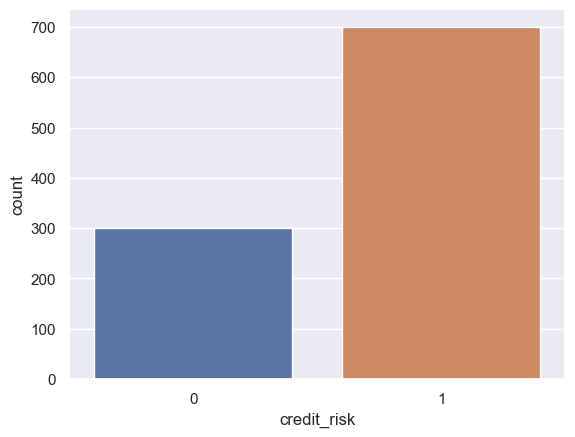

In [13]:
sns.set_theme(style = 'darkgrid')
sns.countplot(x= 'credit_risk',data =df)

<Axes: xlabel='foreign_worker', ylabel='count'>

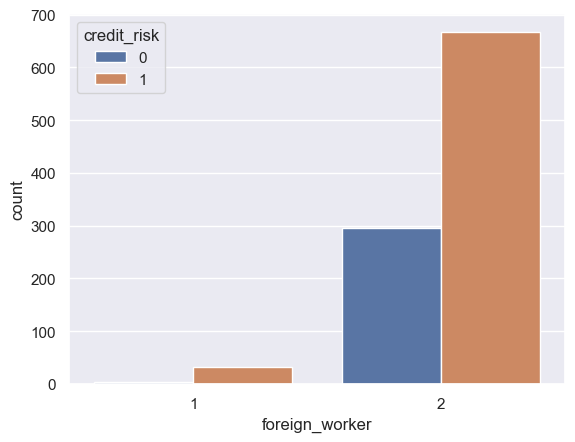

In [14]:
sns.set_theme(style = 'darkgrid')
sns.countplot(x='foreign_worker',hue='credit_risk',data = df)


<Axes: xlabel='credit_risk', ylabel='count'>

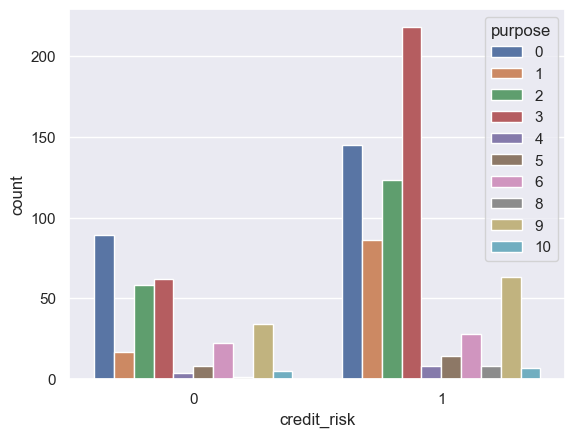

In [15]:
sns.set_theme(style = 'darkgrid')
sns.countplot(x='credit_risk',hue = 'purpose',data = df)

(array([ 81., 211., 153., 123.,  91.,  79.,  46.,  32.,  19.,  30.,  27.,
         23.,  18.,  11.,   9.,   6.,   7.,   6.,   4.,   5.,   5.,   1.,
          3.,   4.,   1.,   4.,   0.,   0.,   0.,   1.]),
 array([  250. ,   855.8,  1461.6,  2067.4,  2673.2,  3279. ,  3884.8,
         4490.6,  5096.4,  5702.2,  6308. ,  6913.8,  7519.6,  8125.4,
         8731.2,  9337. ,  9942.8, 10548.6, 11154.4, 11760.2, 12366. ,
        12971.8, 13577.6, 14183.4, 14789.2, 15395. , 16000.8, 16606.6,
        17212.4, 17818.2, 18424. ]),
 <BarContainer object of 30 artists>)

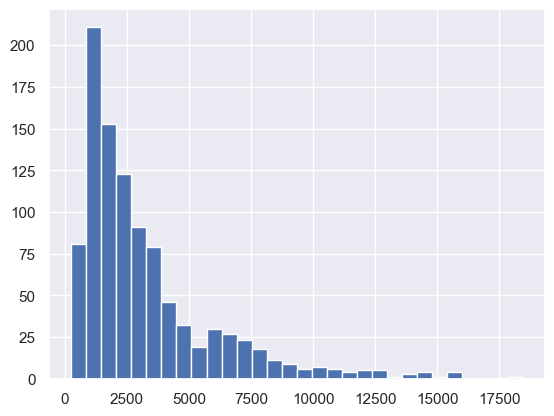

In [16]:
plt.hist(x = 'amount',bins = 30,data = df)

Text(0.5, 1.0, 'Bad loans amount histogram')

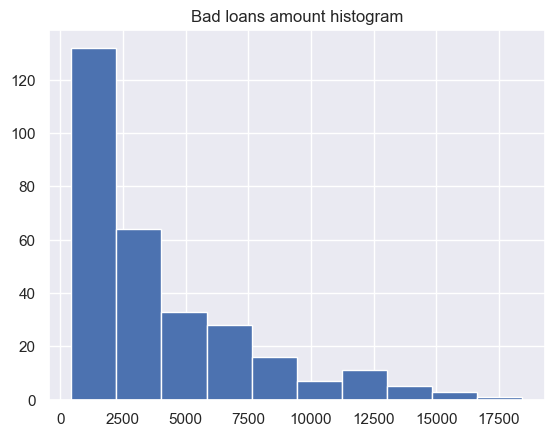

In [17]:
plt.hist(data = df[df['credit_risk']==0],x='amount')
plt.title('Bad loans amount histogram')

In [18]:
max(df[df['credit_risk']==0]['amount'])

18424

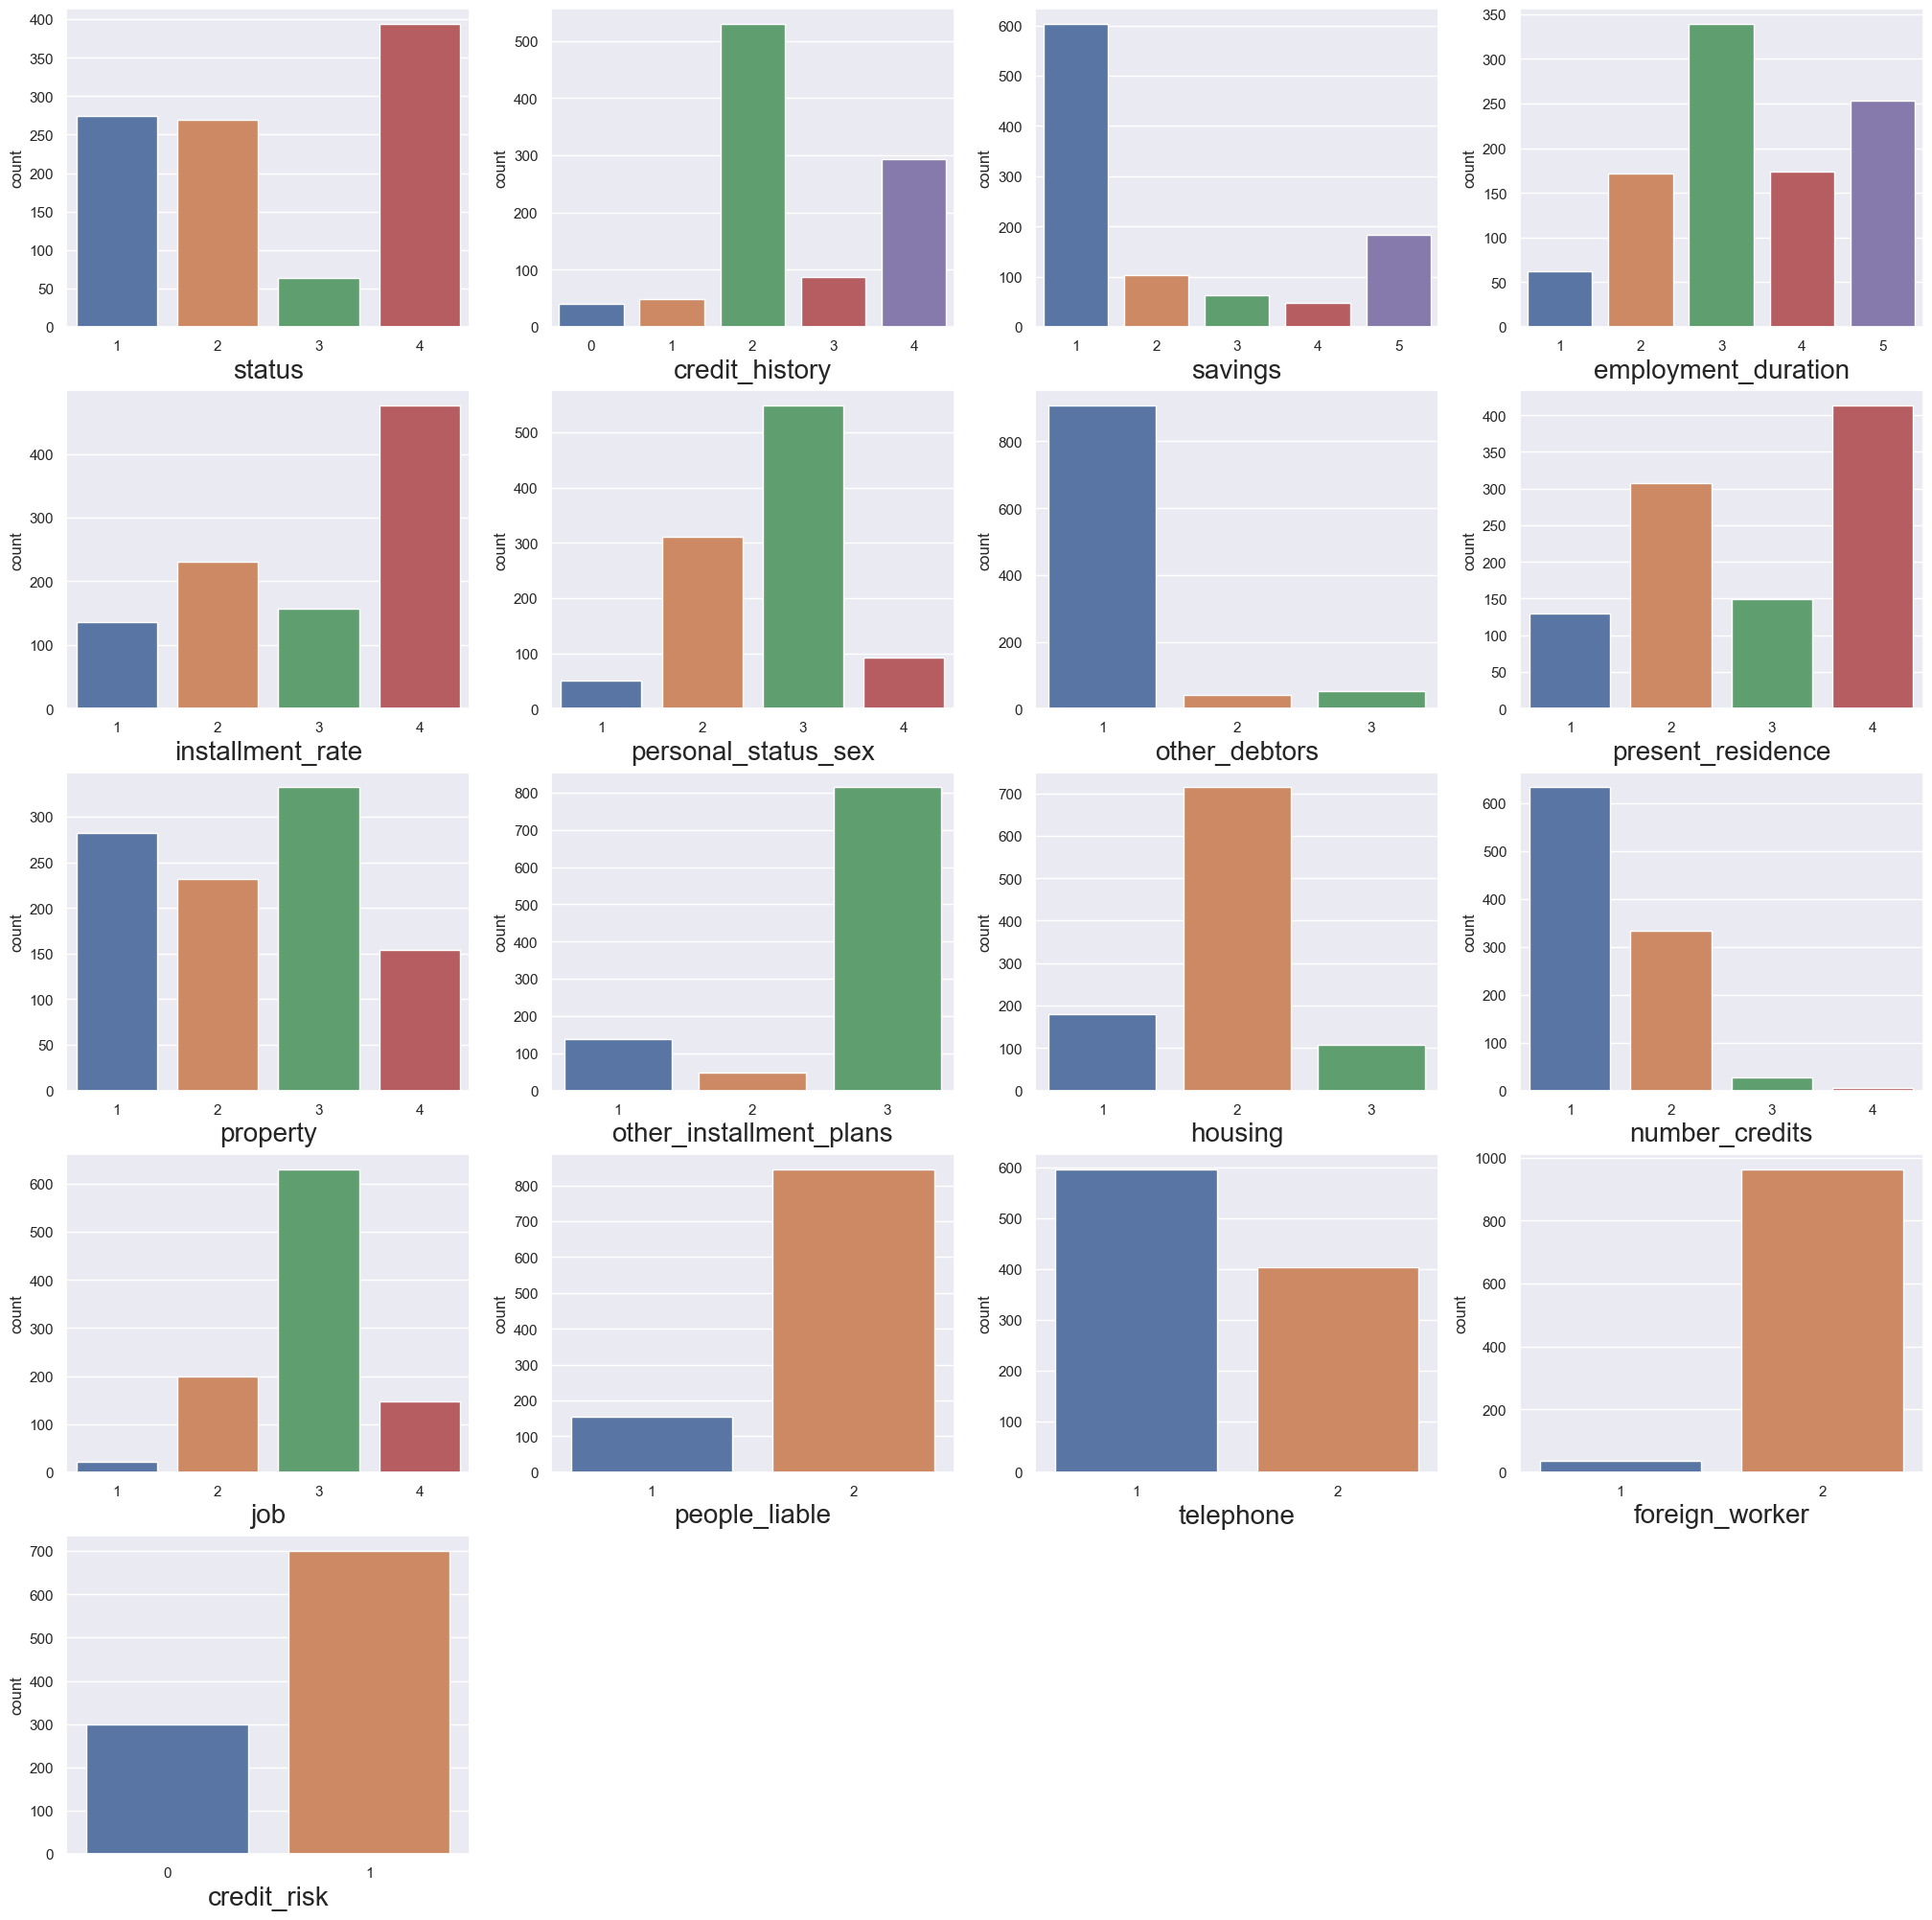

In [19]:
plt.figure(figsize = (25,25),facecolor='white')
plotnumber = 1

for i in discrete_var:
    if plotnumber <= 17: #bcz there are 17 features in discrete variable
        ax = plt.subplot(5,4,plotnumber)
        sns.countplot(x = i,data = df[discrete_var])
        plt.xlabel(i,fontsize = 20)
        plotnumber += 1
plt.show()

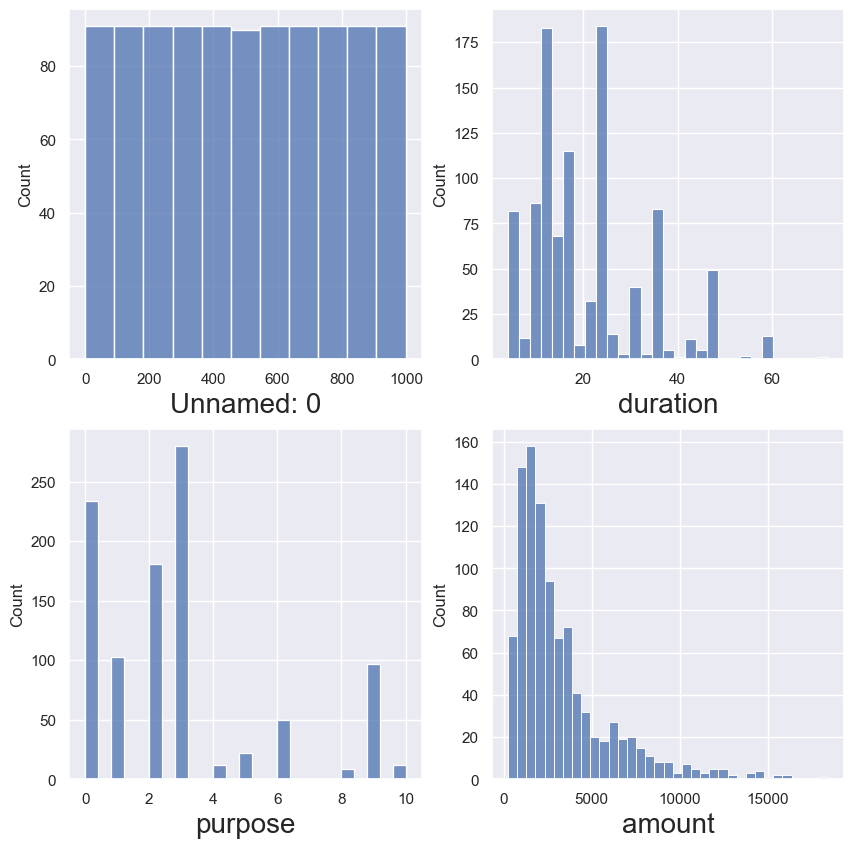

In [20]:
plt.figure(figsize =(10,10))
plotnumber = 1

for i in continous_var: # bcz there are 4 features in continous_var
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.histplot(x = i,data = df[continous_var])
        plt.xlabel(i,fontsize = 20)
    plotnumber +=1
plt.show()

## Preprocessing



In [21]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)


In [22]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [23]:
# checking for outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

In [24]:
((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).sum()

status                       0
duration                    70
credit_history               0
purpose                    118
amount                      72
savings                      0
employment_duration          0
installment_rate             0
personal_status_sex          0
other_debtors               93
present_residence            0
property                     0
age                         23
other_installment_plans    186
housing                    286
number_credits               6
job                        370
people_liable              155
telephone                    0
foreign_worker              37
credit_risk                  0
dtype: int64

In [25]:
columns=['duration','purpose','amount','other_debtors','age','other_installment_plans','housing','number_credits','job',
        'people_liable','foreign_worker']
for i in columns:
    q75,q25 = np.percentile(df[i],[75,25])
    iqr = q75-q25
    minimum = q25-1.5*iqr
    maximum = q75 + 1.5*iqr
    df.loc[df[i]<minimum,i] = minimum
    df.loc[df[i]>maximum,i]= maximum



In [26]:
((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [27]:
df.skew()

status                     0.006957
duration                   0.625672
credit_history            -0.011886
purpose                    0.488335
amount                     1.028761
savings                    1.016677
employment_duration       -0.117615
installment_rate          -0.531348
personal_status_sex       -0.305146
other_debtors              0.000000
present_residence         -0.272570
property                   0.045673
age                        0.906997
other_installment_plans    0.000000
housing                    0.000000
number_credits             1.098240
job                        0.000000
people_liable              0.000000
telephone                  0.391868
foreign_worker             0.000000
credit_risk               -0.874183
dtype: float64

In [28]:
col =['amount','savings','number_credits']
for i in col:
    df[i] = np.log(df[i]+1)
df.skew()

status                     0.006957
duration                   0.625672
credit_history            -0.011886
purpose                    0.488335
amount                    -0.092265
savings                    0.832475
employment_duration       -0.117615
installment_rate          -0.531348
personal_status_sex       -0.305146
other_debtors              0.000000
present_residence         -0.272570
property                   0.045673
age                        0.906997
other_installment_plans    0.000000
housing                    0.000000
number_credits             0.824755
job                        0.000000
people_liable              0.000000
telephone                  0.391868
foreign_worker             0.000000
credit_risk               -0.874183
dtype: float64

C:\Users\rizvi\anaconda3\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


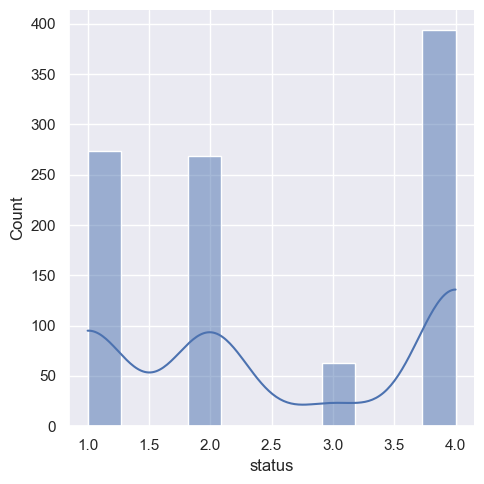

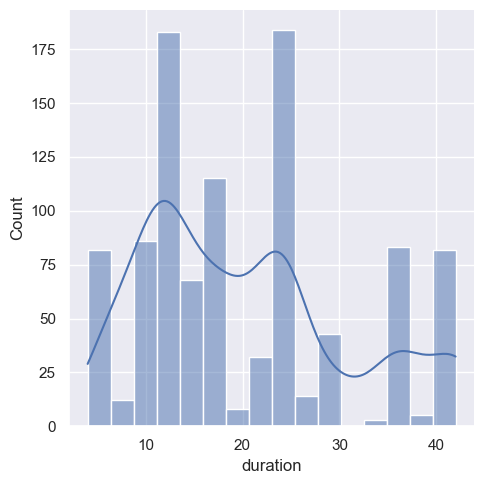

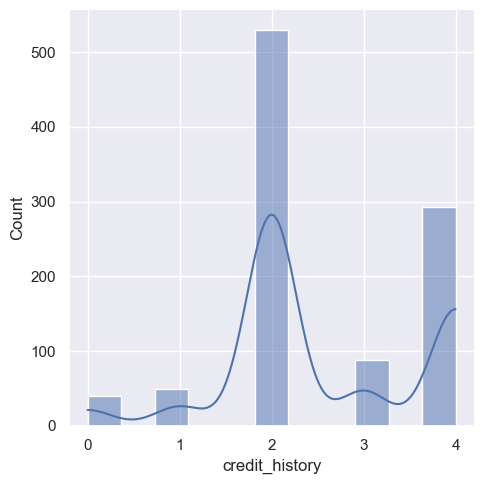

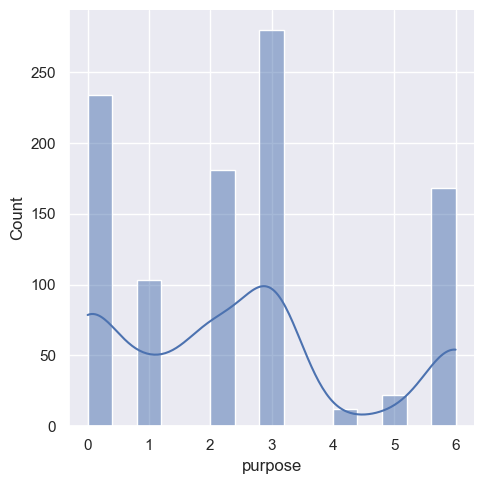

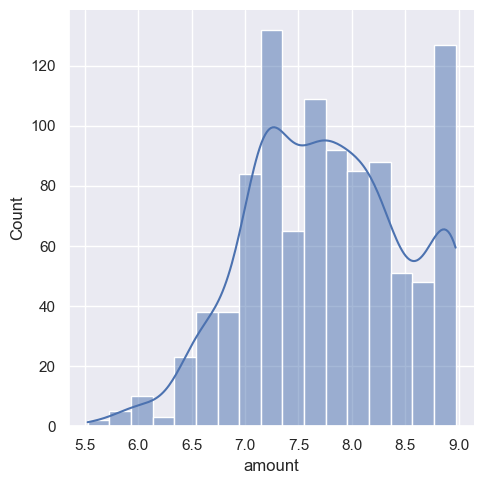

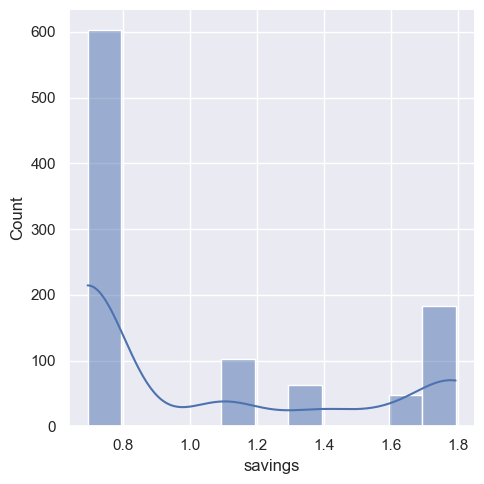

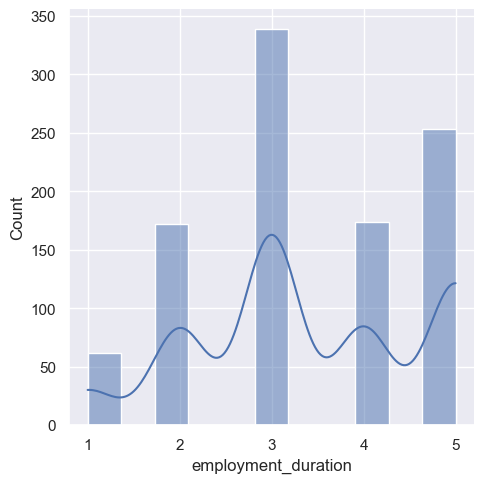

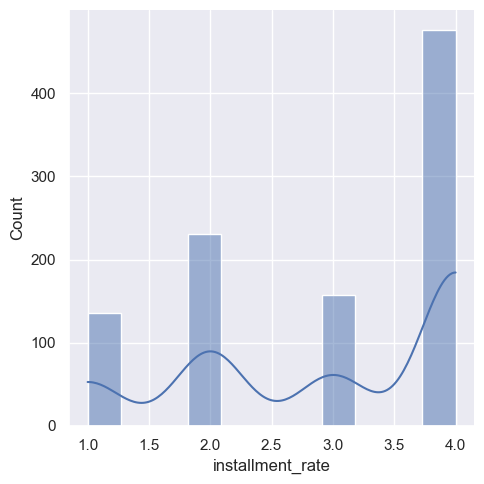

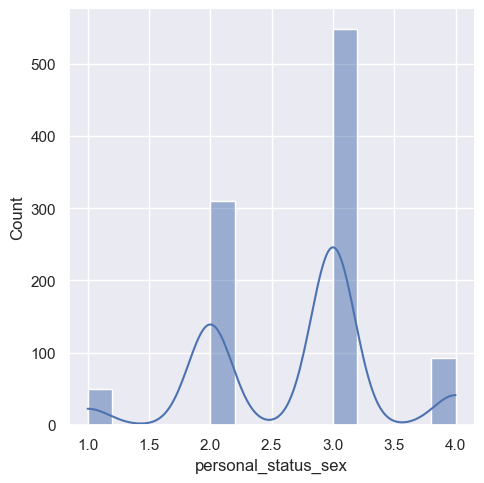

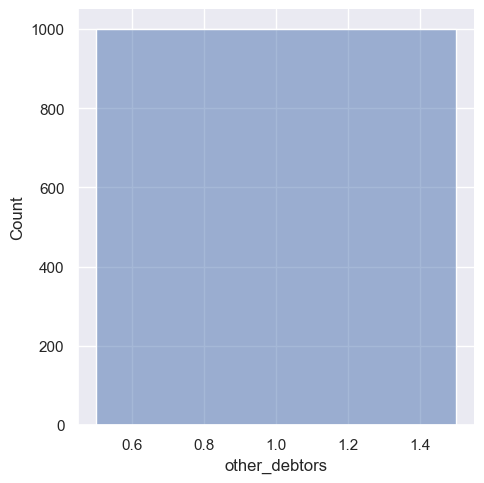

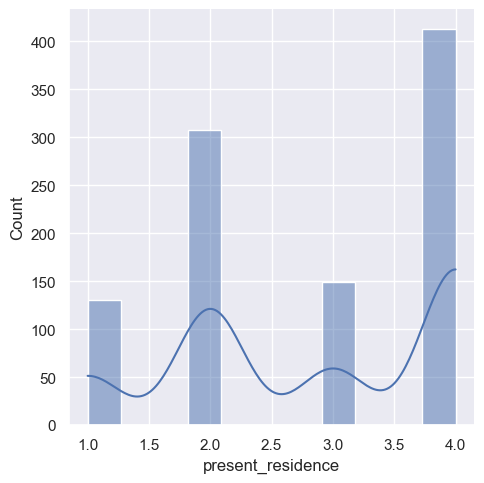

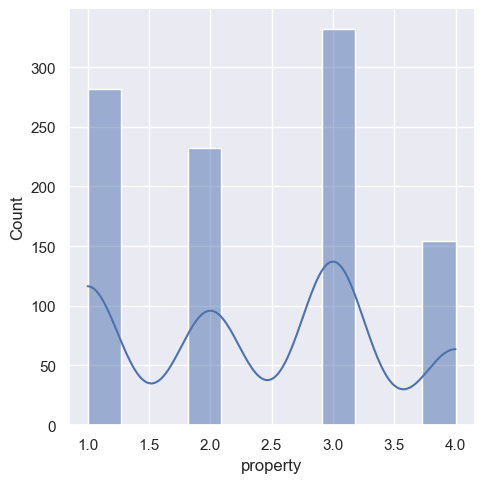

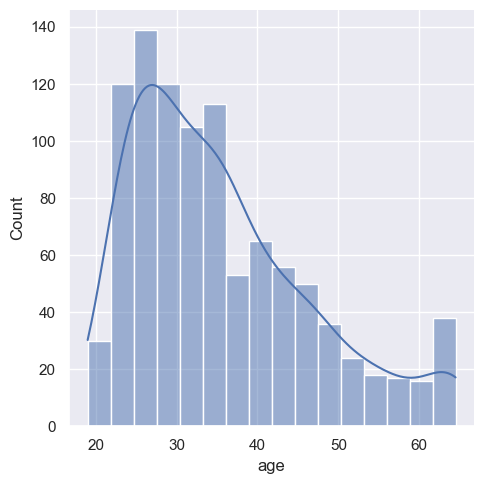

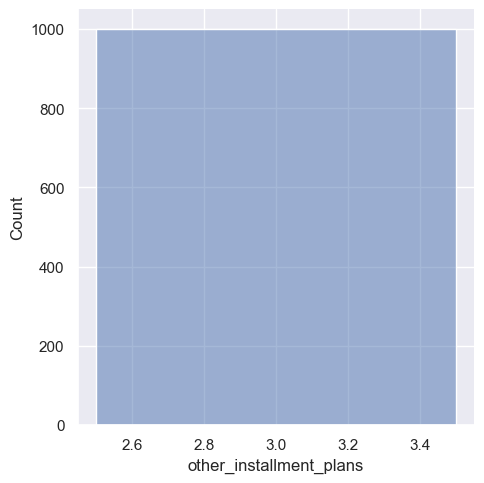

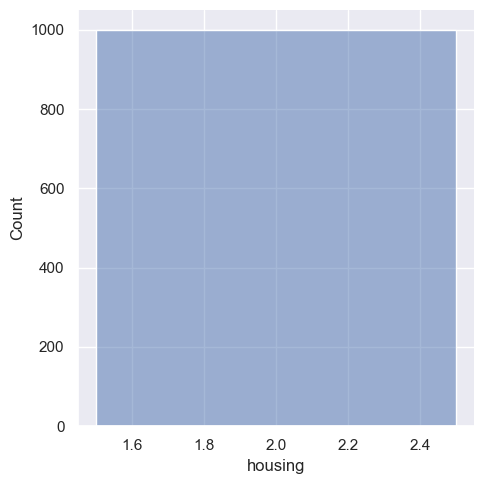

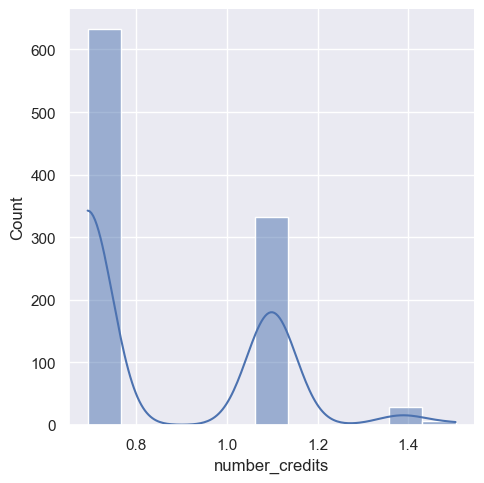

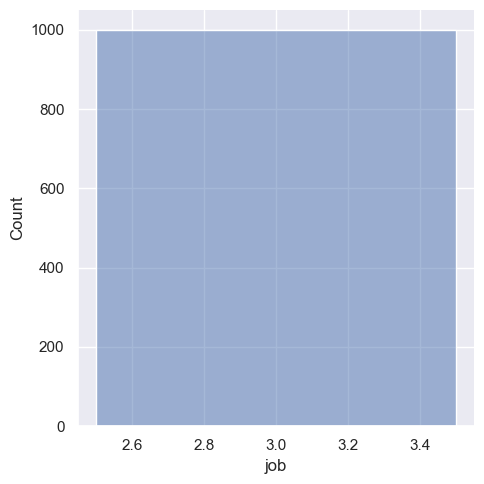

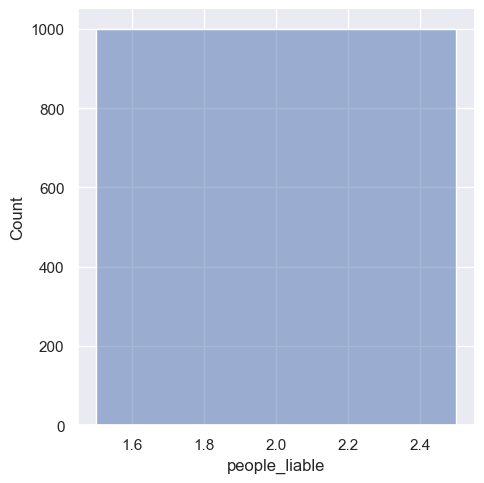

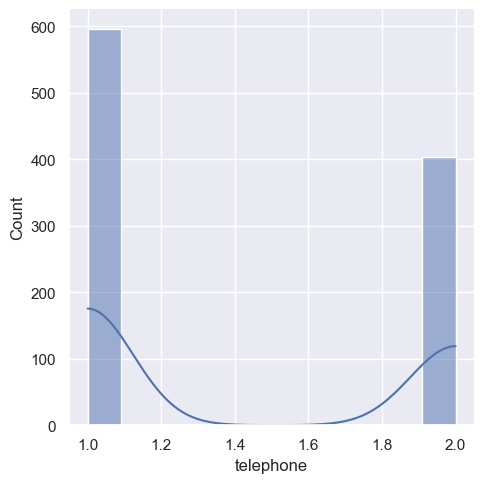

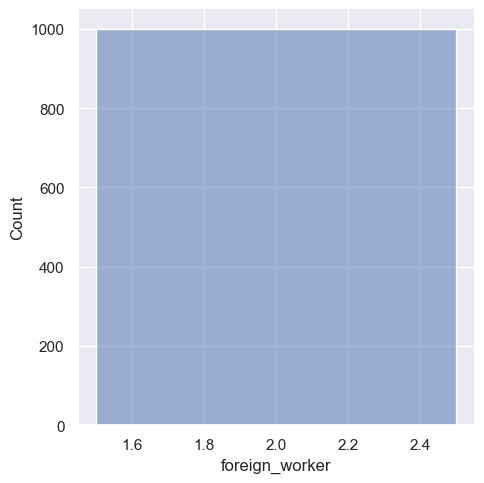

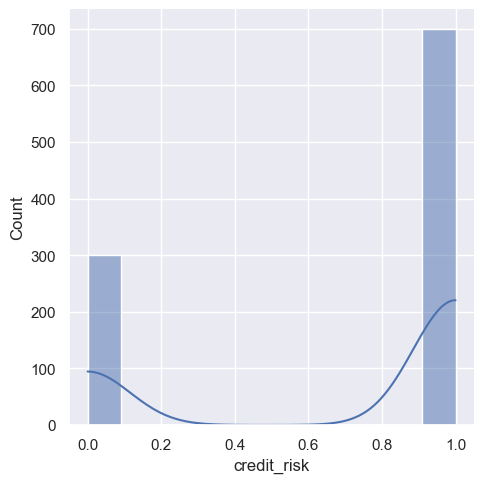

In [29]:
for i in df.columns:
    sns.displot(data = df,x =i,kde=True)
    

In [30]:
del df['other_debtors']
del df['other_installment_plans']
del df['housing']
del df['job']
del df['people_liable']
del df['foreign_worker']


In [31]:
scaling = [feature for feature in df.columns if feature not in ['credit_risk']]


In [32]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[scaling])
scaler.transform(df[scaling])


array([[-1.25456565, -0.21743962,  1.34401408, ..., -1.30441307,
        -0.73657304, -0.82331789],
       [-1.25456565, -1.0657086 ,  1.34401408, ...,  0.0496958 ,
         1.13829638, -0.82331789],
       [-0.45902624, -0.78295227, -0.50342796, ..., -1.12386522,
        -0.73657304, -0.82331789],
       ...,
       [ 1.13205258,  0.06531671,  1.34401408, ..., -0.49194775,
        -0.73657304,  1.21459768],
       [-0.45902624, -0.78295227, -0.50342796, ...,  1.49407859,
        -0.73657304,  1.21459768],
       [-1.25456565,  0.91358569, -0.50342796, ..., -0.40167383,
        -0.73657304, -0.82331789]])

In [33]:
df2 = pd.DataFrame(scaler.transform(df[scaling]),columns=df[scaling].columns)

In [34]:
final = pd.concat([df[['credit_risk']].reset_index(drop=True),df2],axis =1)

In [35]:
final.head()

,credit_risk,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,number_credits,telephone
0,1,-1.254566,-0.217440,1.344014,-0.234588,-1.103856,-0.740466,-1.145978,0.918477,-0.963650,1.046987,-0.341055,-1.304413,-0.736573,-0.823318
1,1,-1.254566,-1.065709,1.344014,-1.230716,0.231565,-0.740466,-0.317959,-0.870183,0.449326,-0.765977,-1.293723,0.049696,1.138296,-0.823318
2,1,-0.459026,-0.782952,-0.503428,1.757667,-1.404433,0.168067,0.510060,-0.870183,-0.963650,1.046987,-1.293723,-1.123865,-0.736573,-0.823318
3,1,-1.254566,-0.782952,1.344014,-1.230716,-0.145290,-0.740466,-0.317959,0.024147,0.449326,-0.765977,-1.293723,0.320518,1.138296,-0.823318
4,1,-1.254566,-0.782952,1.344014,-1.230716,-0.114223,-0.740466,-0.317959,0.918477,0.449326,1.046987,-0.341055,0.230244,1.138296,-0.823318


### MODEL BUILDING


In [36]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import ADASYN
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from collections import Counter
from scipy.stats import randint
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import warnings
import pickle

In [37]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')




In [38]:


X=df.drop(['credit_risk'],axis=1)
y=df['credit_risk']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
def model(X=X_train, y=y_train):
    
    models=[]
    models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
    models.append(('XGBClassifier',XGBClassifier(eval_metric='mlogloss')))
    models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
    models.append(('RandomForestClassifier',RandomForestClassifier()))
    models.append(('AdaBoostClassifier',AdaBoostClassifier()))
    models.append(('LogisticRegression',LogisticRegression()))
    models.append(('BaggingClassifier',BaggingClassifier()))
    models.append(('LGBMClassifier',LGBMClassifier()))
    models.append(('SGDClassifier',SGDClassifier()))
    models.append(('SVC',SVC()))
    
    results =[]
    names   =[]
    scoring ='accuracy'
    for name, model in models:
        #kfold = KFold(n_splits=10, random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10, random_state=42, n_repeats=3)
        cross = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cross)
        names.append(name)
        print (f'Model:{name},Mean: {cross.mean()},Std Dev: {cross.std()}')
        print('---'*25)

model(X_train,y_train)


Model:GradientBoostingClassifier,Mean: 0.7666666666666665,Std Dev: 0.046472811645328946
---------------------------------------------------------------------------
Model:XGBClassifier,Mean: 0.7495833333333334,Std Dev: 0.04857161093569873
---------------------------------------------------------------------------
Model:DecisionTreeClassifier,Mean: 0.705,Std Dev: 0.05387098786297996
---------------------------------------------------------------------------
Model:RandomForestClassifier,Mean: 0.7604166666666666,Std Dev: 0.04258365948994467
---------------------------------------------------------------------------
Model:AdaBoostClassifier,Mean: 0.7595833333333333,Std Dev: 0.03773307199556142
---------------------------------------------------------------------------
Model:LogisticRegression,Mean: 0.76,Std Dev: 0.0395811402901264
---------------------------------------------------------------------------
Model:BaggingClassifier,Mean: 0.74,Std Dev: 0.046142893999690425
---------------------

In [48]:
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
X_res,y_res = ada.fit_resample(X_train,y_train)
Counter(y_res)
model(X_res,y_res)


Model:GradientBoostingClassifier,Mean: 0.8135135135135133,Std Dev: 0.029571328579759023
---------------------------------------------------------------------------
Model:XGBClassifier,Mean: 0.8307316407316405,Std Dev: 0.03616597749326635
---------------------------------------------------------------------------
Model:DecisionTreeClassifier,Mean: 0.7494512694512694,Std Dev: 0.044755750349178336
---------------------------------------------------------------------------
Model:RandomForestClassifier,Mean: 0.8340840840840841,Std Dev: 0.033185593044611536
---------------------------------------------------------------------------
Model:AdaBoostClassifier,Mean: 0.8051023751023749,Std Dev: 0.03560750933048074
---------------------------------------------------------------------------
Model:LogisticRegression,Mean: 0.76002457002457,Std Dev: 0.028013829732355906
---------------------------------------------------------------------------
Model:BaggingClassifier,Mean: 0.8023150423150424,Std Dev:

In [50]:
param_distribs = {'n_estimators': randint(low=1, high=500),
                  'max_depth': randint(low=1, high=10),
                  'max_features':randint(low=1,high=10),
                 }
rnd_RF = RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_distribs,n_iter=10,cv=5,scoring='accuracy', 
                            random_state=42)

rnd_RF.fit(X_res,y_res)
rnd_RF.best_params_


RFClassifier = RandomForestClassifier(max_depth=8, max_features=5, n_estimators=103, random_state=42)
RFClassifier.fit(X_res,y_res)

RandomForestClassifier(max_depth=8, max_features=5, n_estimators=103,
                       random_state=42)

In [51]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8],'booster': ['gbtree','dart'],
              'learning_rate':[0.3,0.5,0.01,0.1]}]

grid_xgb = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid=param_grid, cv=5, scoring='accuracy', 
                        return_train_score=True)

grid_xgb.fit(X_res,y_res)
grid_xgb.best_params_


XGClassifier=XGBClassifier(booster='gbtree', learning_rate=0.5, max_depth=8, n_estimators=30, eval_metric='mlogloss')
XGClassifier.fit(X_res,y_res)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [52]:
BClassifier = BaggingClassifier(base_estimator=XGBClassifier(eval_metric='mlogloss'),random_state=42)
BClassifier.fit(X_res,y_res)



BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric='mlogloss',
                                               feature_types=None, gamma=None,
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None,
                                               random_state=None, ...),
                  random_state=42)

In [53]:
LGBClassifier=LGBMClassifier(random_state=42)
LGBClassifier.fit(X_res,y_res)



LGBMClassifier(random_state=42)

In [54]:
GBClassifier=GradientBoostingClassifier(random_state=42)
GBClassifier.fit(X_res,y_res)

GradientBoostingClassifier(random_state=42)

In [55]:
prediction_RF = RFClassifier.predict(X_test)

prediction_XGB = XGClassifier.predict(X_test)

prediction_Bagg = BClassifier.predict(X_test)

prediction_LGBM = LGBClassifier.predict(X_test)

prediction_GB = GBClassifier.predict(X_test)


In [56]:
print('Accuracy RForest...{}'.format(accuracy_score(y_test,prediction_RF)))
print('---'*25)
print('Accuracy XGBoost...{}'.format(accuracy_score(y_test,prediction_XGB)))
print('---'*25)
print('Accuracy Bagging...{}'.format(accuracy_score(y_test,prediction_Bagg)))
print('---'*25)
print('Accuracy LightGBM...{}'.format(accuracy_score(y_test,prediction_LGBM)))
print('---'*25)
print('Accuracy Gradient...{}'.format(accuracy_score(y_test,prediction_GB)))
print('---'*25)



Accuracy RForest...0.755
---------------------------------------------------------------------------
Accuracy XGBoost...0.74
---------------------------------------------------------------------------
Accuracy Bagging...0.73
---------------------------------------------------------------------------
Accuracy LightGBM...0.73
---------------------------------------------------------------------------
Accuracy Gradient...0.745
---------------------------------------------------------------------------


In [57]:
print('Precision RForest...{}'.format(precision_score(y_test,prediction_RF)))
print('---'*25)
print('Precision XGBoost...{}'.format(precision_score(y_test,prediction_XGB)))
print('---'*25)
print('Precision Bagging...{}'.format(precision_score(y_test,prediction_Bagg)))
print('---'*25)
print('Precision LightGBM...{}'.format(precision_score(y_test,prediction_LGBM)))
print('---'*25)
print('Precision Gradient...{}'.format(precision_score(y_test,prediction_GB)))
print('---'*25)

Precision RForest...0.856
---------------------------------------------------------------------------
Precision XGBoost...0.8115942028985508
---------------------------------------------------------------------------
Precision Bagging...0.8088235294117647
---------------------------------------------------------------------------
Precision LightGBM...0.8181818181818182
---------------------------------------------------------------------------
Precision Gradient...0.8175182481751825
---------------------------------------------------------------------------


In [58]:
print('Recall RForest...{}'.format(recall_score(y_test,prediction_RF)))
print('---'*25)
print('Recall XGBoost...{}'.format(recall_score(y_test,prediction_XGB)))
print('---'*25)
print('Recall Bagging...{}'.format(recall_score(y_test,prediction_Bagg)))
print('---'*25)
print('Recall LightGBM...{}'.format(recall_score(y_test,prediction_LGBM)))
print('---'*25)
print('Recall Gradient...{}'.format(recall_score(y_test,prediction_GB)))
print('---'*25)


Recall RForest...0.7753623188405797
---------------------------------------------------------------------------
Recall XGBoost...0.8115942028985508
---------------------------------------------------------------------------
Recall Bagging...0.7971014492753623
---------------------------------------------------------------------------
Recall LightGBM...0.782608695652174
---------------------------------------------------------------------------
Recall Gradient...0.8115942028985508
---------------------------------------------------------------------------


In [59]:
print('Confusion Matrix RForest... \n {}'.format(confusion_matrix(y_test,prediction_RF)))
print('---'*25)
print('Confusion Matrix XGBoost... \n {}'.format(confusion_matrix(y_test,prediction_XGB)))
print('---'*25)
print('Confusion Matrix Bagging... \n {}'.format(confusion_matrix(y_test,prediction_Bagg)))
print('---'*25)
print('Confusion Matrix LightGBM... \n {}'.format(confusion_matrix(y_test,prediction_LGBM)))
print('---'*25)
print('Confusion Matrix Gradient... \n {}'.format(confusion_matrix(y_test,prediction_GB)))
print('---'*25)

Confusion Matrix RForest... 
 [[ 44  18]
 [ 31 107]]
---------------------------------------------------------------------------
Confusion Matrix XGBoost... 
 [[ 36  26]
 [ 26 112]]
---------------------------------------------------------------------------
Confusion Matrix Bagging... 
 [[ 36  26]
 [ 28 110]]
---------------------------------------------------------------------------
Confusion Matrix LightGBM... 
 [[ 38  24]
 [ 30 108]]
---------------------------------------------------------------------------
Confusion Matrix Gradient... 
 [[ 37  25]
 [ 26 112]]
---------------------------------------------------------------------------


In [61]:
file = 'Credit_Data_RF.pkl'

pickle.dump(RFClassifier,open(file,'wb'))